# Multiple Linear Regression

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [6]:
df = pd.read_csv('gadget_store_data.csv')
df

,Product,Price,Units_Sold,Marketing_Spend,Discount,Store_Rating,Revenue
0,Headphones,624.356166,491,10048.003239,18.997223,4.870045,320990.190077
1,Bluetooth Speaker,1431.000029,145,16796.058311,22.077138,1.741835,230842.337861
2,Smartphone,1124.791519,306,6847.767556,25.443843,2.848389,328193.209929
3,Smartphone,938.121878,374,16511.328969,3.683307,1.004927,346213.668259
4,Gaming Console,318.426097,53,19391.501543,26.293322,3.393309,35562.237686
...,...,...,...,...,...,...,...
345,Fitness Tracker,962.190137,121,18943.784786,15.910632,3.412878,113665.493470
346,Monitor,989.131111,88,3680.555127,0.535857,2.348909,91900.874839
347,Smartphone,163.425614,203,8721.453857,23.903935,4.622099,33831.703962
348,Gaming Console,624.457660,299,7155.811161,8.825039,4.090491,181177.061530


In [9]:
X = df[['Price', 'Units_Sold', 'Marketing_Spend', 'Discount', 'Store_Rating' ]] #independent variables
Y = df['Revenue'] #dependent variable

In [11]:
#Add a constant to the independent variable
X = sm.add_constant(X)

#fit the regression model
model = sm.OLS(Y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     494.1
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          1.40e-154
Time:                        10:55:49   Log-Likelihood:                -4314.0
No. Observations:                 350   AIC:                             8640.
Df Residuals:                     344   BIC:                             8663.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.133e+05   1.45e+04    -14.722      0.000   -2.42e+05   -1.85e+05
Price             270.6047      7.248     37.333      0.000     256.348     284.861
Units_Sold        787.7972     22.825     34.515      0.000     742.904     832.691
Marketing_Spend     0.3662      0.568      0.645      0.519      -0.750       1.482
Discount         -512.7581    328.235     -1.562      0.119   -1158.359     132.843
Store_Rating     1455.0668   2724.537      0.534      0.594   -3903.782    6813.916
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.854
Skew:                          -0.082   Prob(JB):                        0.653
Kurtosis:                       3.177   Cond. No.                     5.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
df['predicted_revenue'] = model.predict(X)
df[['Revenue','predicted_revenue' ]].head()

,Revenue,predicted_revenue
0,320990.190077,343464.501092
1,230842.337861,285508.133205
2,328193.209929,325723.152563
3,346213.668259,340793.648054
4,35562.237686,-86845.452027


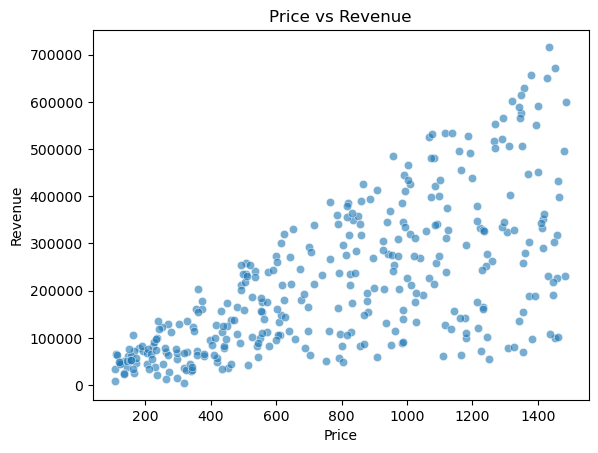

In [15]:
sns.scatterplot(x='Price',y='Revenue', data = df, alpha = 0.6)
plt.title('Price vs Revenue')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.show()

In [17]:
correlation = stats.pearsonr(df['Revenue'], df['Price'])
correlation

PearsonRResult(statistic=0.6652104861968892, pvalue=4.49015130057096e-46)

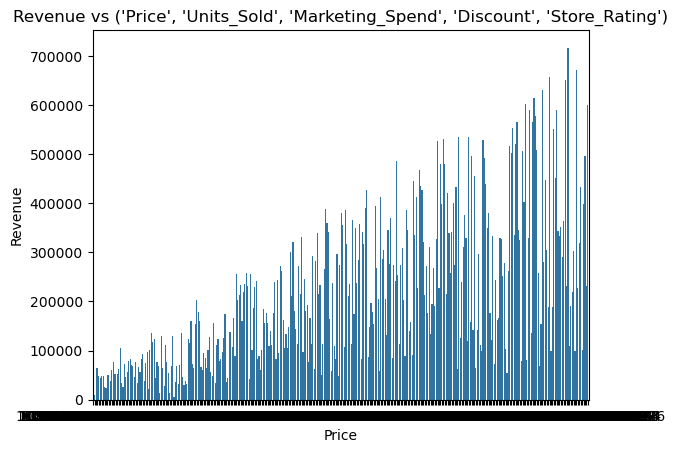

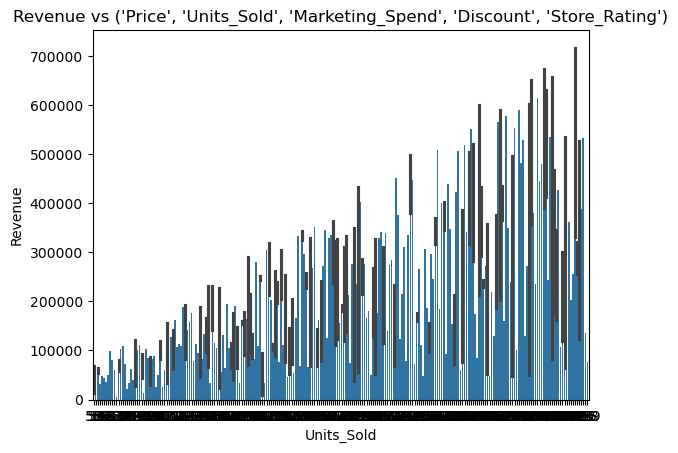

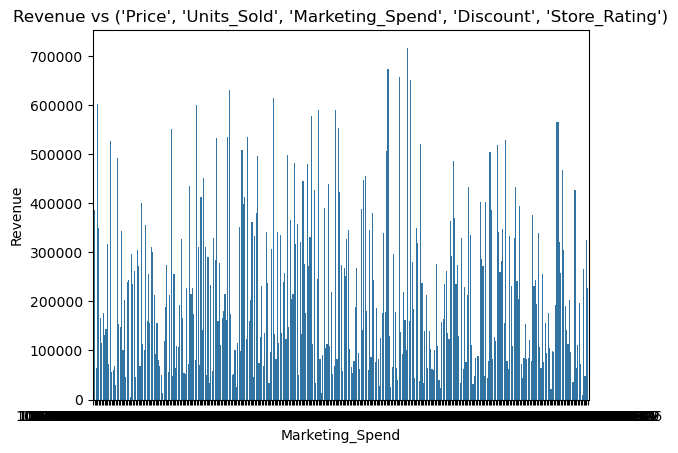

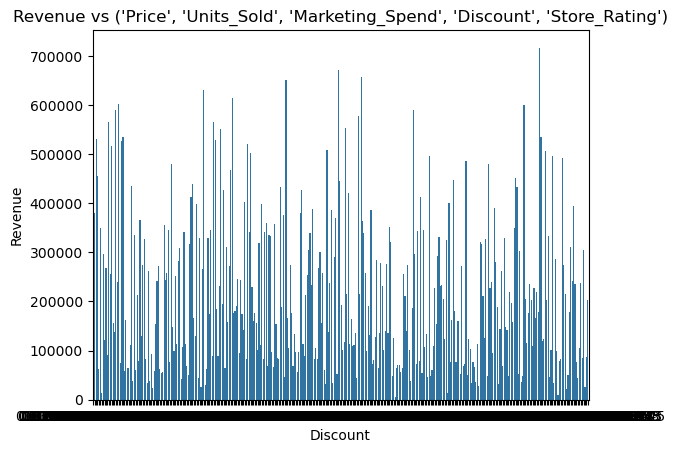

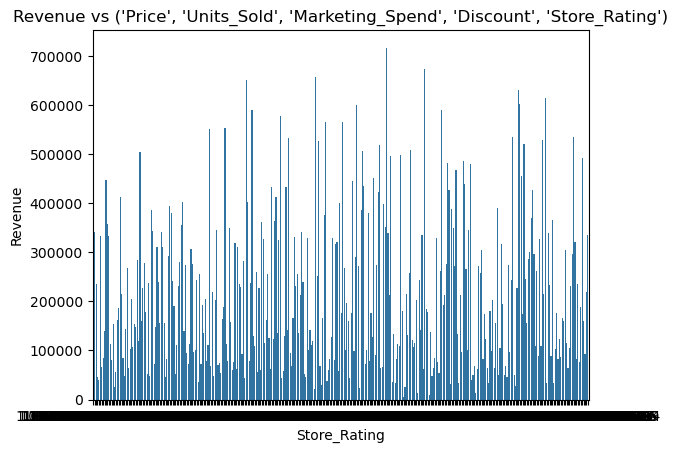

In [30]:
columns_of_interests = ['Price', 'Units_Sold', 'Marketing_Spend', 'Discount', 'Store_Rating', 'Revenue']
for column in columns_of_interests[:-1]: 
    sns.barplot(x=column, y = 'Revenue', data = df)
    plt.title(f'Revenue vs {'Price', 'Units_Sold', 'Marketing_Spend', 'Discount', 'Store_Rating'}')
    plt.show()

# Variance Inflation Factor Analysis
used to investigate why cond. No. is on the high side

In [27]:
predictors = df[['Price', 'Units_Sold', 'Marketing_Spend', 'Discount', 'Store_Rating']]
vif_data = pd.DataFrame()
vif_data['Feature'] = predictors.columns
vif_data['VIF'] = [(predictors.values, i) for i in range(predictors.shape[1])]

vif_data

,Feature,VIF
0,Price,"([[624.3561663863075, 491.0, 10048.00323899126..."
1,Units_Sold,"([[624.3561663863075, 491.0, 10048.00323899126..."
2,Marketing_Spend,"([[624.3561663863075, 491.0, 10048.00323899126..."
3,Discount,"([[624.3561663863075, 491.0, 10048.00323899126..."
4,Store_Rating,"([[624.3561663863075, 491.0, 10048.00323899126..."


In [25]:
# Select the predictor variables (exclude the target variable)
predictors = df[['Price', 'Units_Sold', 'Discount', 'Marketing_Spend', 'Store_Rating']]  # Update with your predictor variables

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

print(vif_data)

NameError: name 'variance_inflation_factor' is not defined